# Comparing Total Wage Between Males and Females

### Introduction

**Research Question:** Is there a significant difference between the average salary for men and women? 

*Variable of interest:* Annual Salary. <br>
*Categories:* Men and Women.

Past research has shown there is an appreciable difference in salary between men and women, even when working the same jobs (Hoisl & Mariani, 2016). We want to see if the same pattern can be observed when we use a dataset to compare the mean salary between these two genders. To further look into this question, we will use the dataset glassdoor_salaries.csv from 2019, containing 1001 rows of data. The dataset contains 9 columns (see Preliminary Results section for details). As we want to compare gender and total salary, we will clean and wrangle our dataset. Then we will only select the total salary and gender columns.

In [2]:
# Set up
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)

set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Preliminary Results

We will first read the data from from a public github repository to make the data reproducible. We then print a preview of the dataset to see the column names and a few observations.

In [3]:
# Reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/STAT201-GroupProject/main/glassdoor_salaries.csv"
untidy_salary_data <- read_csv(url)

head(untidy_salary_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


We then combine the base pay and bonus into one column and filter for NA values and the variable of interest.

In [4]:
# Tidy dataset, combine BasePay and Bonus into Annual_Salary
salary_data <- 
    untidy_salary_data %>%
    mutate(Annual_Salary = BasePay + Bonus,   # combine BasePay and Bonus into Annual_Salary
           Gender = as.factor(Gender)) %>%    # convert Gender column from <chr> to <fct> 
    select(Gender, Annual_Salary) %>%         # remove irrelevant columns
    na.omit()                                 # remove NAs


head(salary_data)

Gender,Annual_Salary
<fct>,<dbl>
Female,52301
Male,119604
Female,99476
Male,118234
Male,108783
Female,81016


We compare parameter estimates of the males and females by taking the mean, median, and standard deviation of each the male and female subgroups. This provides a quick comparison of the annual salary of males and females.

In [5]:
# table of point estimates of annual salary by gender
salary_data_summary <- 
    salary_data %>% 
    group_by(Gender) %>% 
    summarize(Sample_Size = n(),                             # count number of observations  
              Mean_Salary = mean(Annual_Salary),             # calculate mean
              Min_Salary = min(Annual_Salary),               # calculate min
              Lower_Quartile = quantile(Annual_Salary, 0.25),# calculate lower quartile
              Median_Salary = median(Annual_Salary),         # calculate median
              Upper_Quartile = quantile(Annual_Salary, 0.75),# calculate upper quartile
              Max_Salary = max(Annual_Salary),               # calculate max
              SD_Salary = sd(Annual_Salary))                 # calculate standard deviation
              

salary_data_summary

Gender,Sample_Size,Mean_Salary,Min_Salary,Lower_Quartile,Median_Salary,Upper_Quartile,Max_Salary,SD_Salary
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,468,96416.83,40828,80866.50,96571.0,112660.5,168968,24202.16
Male,532,104918.68,41030,87791.75,105100.5,121617.0,184010,25329.57


Filter for male and female and plot the data of each (to visually compare the male vs. female salaries).

In [6]:
# plot histogram of annual salaries

# plot sample distribution of male's annual salary
male_salary_distribution_plot <- 
    salary_data %>%
    filter(Gender == "Male") %>%  
    ggplot() +
    geom_histogram(aes(x = Annual_Salary),color = "white", bins = 10) +
    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K"),  # change x-axis scale for readability; 
                       limits = c(40000, 200000)) +                                 # set limits for x-axis   
    labs(x = "Annual Salary") +
    ggtitle("Figure 01: Sample Distribution of \nMale Employees' Annual Salary")


# plot sample distribution of female's annual salary
female_salary_distribution_plot <- 
    salary_data %>%
    filter(Gender == "Female") %>%  
    ggplot() +
    geom_histogram(aes(x = Annual_Salary),color = "white", bins = 10) +
    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K"),  # change x-axis scale label for readability; 
                       limits = c(40000, 200000)) +                                 # set limits for x-axis   
    labs(x = "Annual Salary") +
    ggtitle("Figure 02: Sample Distribution of \nFemale Employees' Annual Salary")

We use grid.arrange to plot the two histograms side by side.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


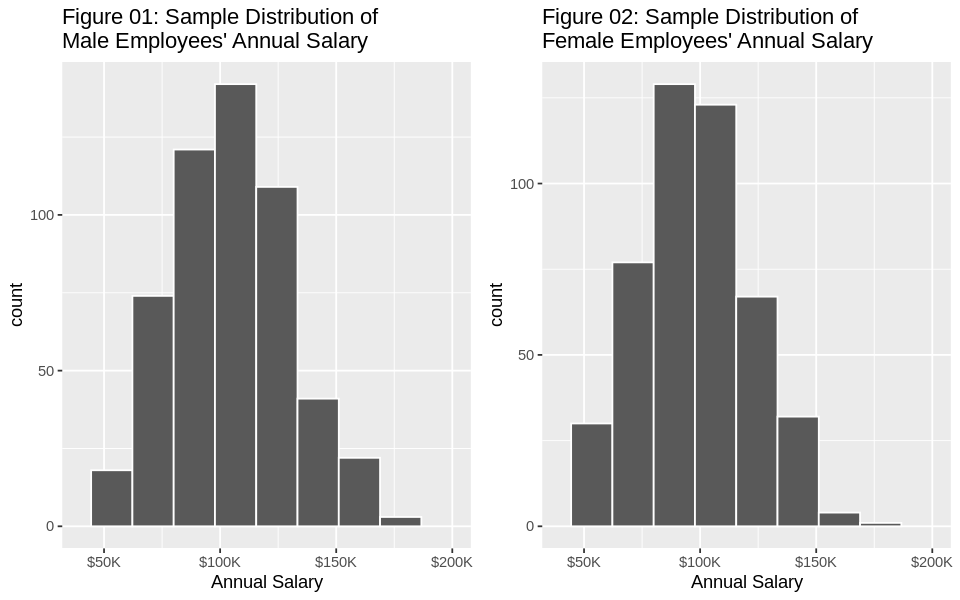

In [7]:
# Sample distribution of Salary
options(repr.plot.width = 8, repr.plot.height = 5)

grid.arrange(male_salary_distribution_plot, female_salary_distribution_plot, ncol = 2)

We can then plot the male and female data using a boxplot. This provides an alternative visual comparison to the histogram. This shows a comparison of the medians and the upper and lower quartiles. Additionally, the plot provides insight into the minimum and maximum.

In [8]:
# Boxplot to compare between Male and Female
salary_boxplot <- 
    salary_data %>%
    ggplot() +
    geom_boxplot(aes(y = Annual_Salary, x = Gender, fill = Gender)) +
    labs(y = "Annual Salary") +
    scale_fill_brewer(palette = "Dark2") +
    scale_y_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +  # change y-axis scale label for readability
    theme(legend.position = "none") +                                                 # remove abundant legend box
    ggtitle("Figure 03: Box Plot of Annual Salary and Gender")

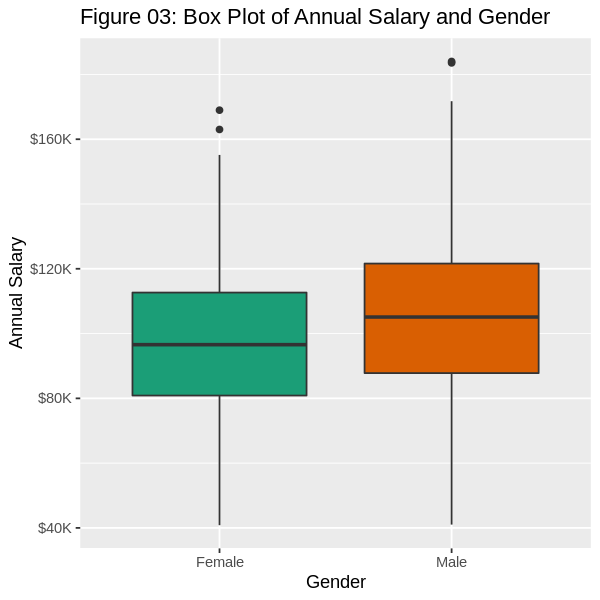

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5)
salary_boxplot

The above plot suggests that there are only a few outliers and there is a difference between these groups. This difference is illustrated through the male group’s box plot having a higher mean and most observations have higher salary than the female group.

### Methods

Using just a sample mean is not sufficient because there is a possibility that the difference in means could happen by chance. Thus, a more statistical test should be used to answer the question. We will use a t-test to test the difference of two sample means (male and female) since we do not have access to the whole population. One assumption of using a two-sample t-test is that the observations in one sample are independent of those in the other sample. The histograms and box plot generated showing the data are approximately normally distributed, hence the t-test is valid for use in this situation.

We will determine if there is a significant difference in the salaries, and if applicable, its magnitude. Therefore, conducting a hypothesis test with the following hypotheses would provide a more accurate conclusion:

**Null hypothesis:** μ Male = μ Female 

**Alternative hypothesis:**  μ Male > μ Female 

We are expecting our results to show the salary of males to be greater than females based on existing studies from Hoisl & Marian (2016) and Blau & Kahn (2017), so a one-tailed alternative is appropriate.

With sufficiently large sample size and sample distributions closely resembling a normal distribution (see histograms and box plot), our results would be trustworthy in reporting the wage gap since the data used is primary numerical data.
This result would corroborate conclusions of current literature on this subject. Future investigations could explore the underlying cause of the difference in salary as well as look into other factors that affect it. 


## Hypothesis Test

### Bootstrap

In [10]:
# calculate the observed difference in mean from salary_data using infer package
# Male's mean minus Females' mean
obs_diff_in_means <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female"))

obs_diff_in_means

stat
<dbl>
8501.847


In [11]:
# generate 5000 samples from the null distribution (sampling distribution if H0 were true) using infer package
# Male's mean minus Females' mean
null_diff_in_salary <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    hypothesize(null = "independence") %>%
    generate(type = "permute", reps = 5000) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female")) 

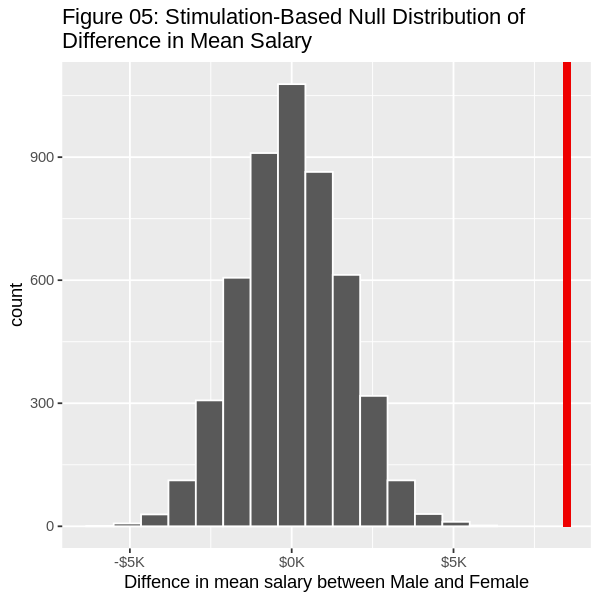

In [12]:
# visualize the null distribution and shade in the p_value
null_distribution <- 
    null_diff_in_salary %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
    xlab("Diffence in mean salary between Male and Female") +
    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +         # change x-axis scale label for readability; 
    ggtitle("Figure 05: Stimulation-Based Null Distribution of \nDifference in Mean Salary") 

null_distribution

In [13]:
# obtain p_value
p_value <-
    null_diff_in_salary %>%
    get_p_value(obs_stat = obs_diff_in_means, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


In [14]:
# obtain confidence interval at 90% confidence level 
ci <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    generate(type = "bootstrap", reps = 5000) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female")) %>%
    get_ci(level = 0.90)

ci

lower_ci,upper_ci
<dbl>,<dbl>
5866.596,11096.56


## T Test

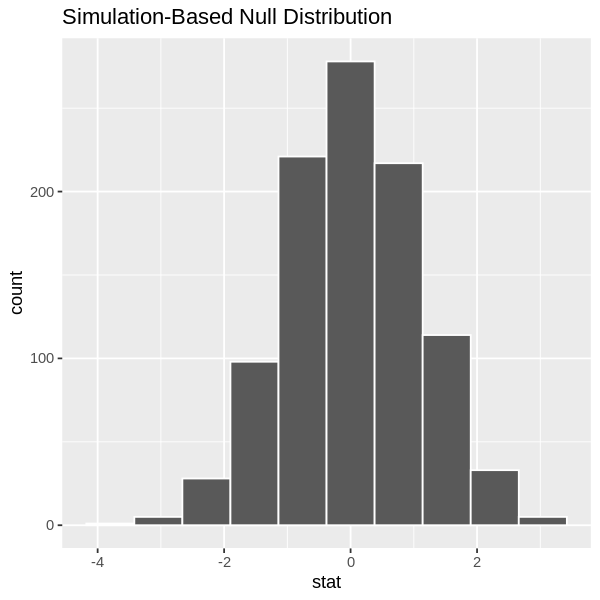

In [15]:
# Construct null distribution of t:
null_distribution_salary_t <- salary_data %>% 
  specify(formula = Annual_Salary ~ Gender) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Male", "Female"))
visualize(null_distribution_salary_t, bins = 10)

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


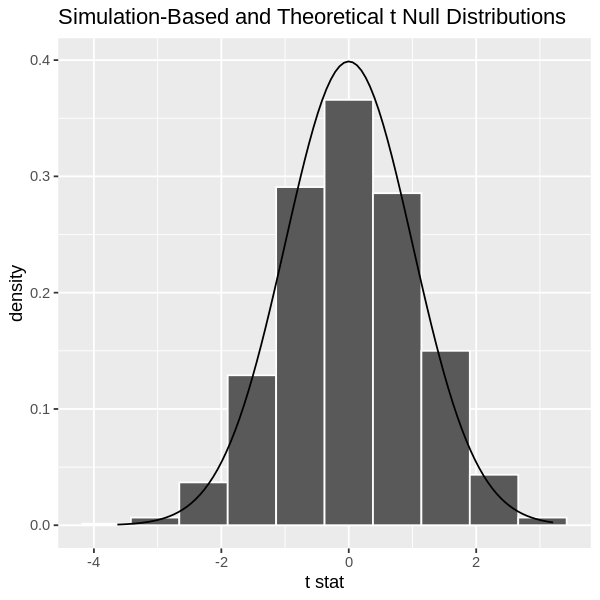

In [18]:
visualize(null_distribution_salary_t, bins = 10, method = "both")

In [19]:
obs_two_sample_t <- salary_data %>% 
  specify(formula = Annual_Salary ~ Gender) %>% 
  calculate(stat = "t", order = c("Male", "Female"))
obs_two_sample_t

stat
<dbl>
5.423247


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


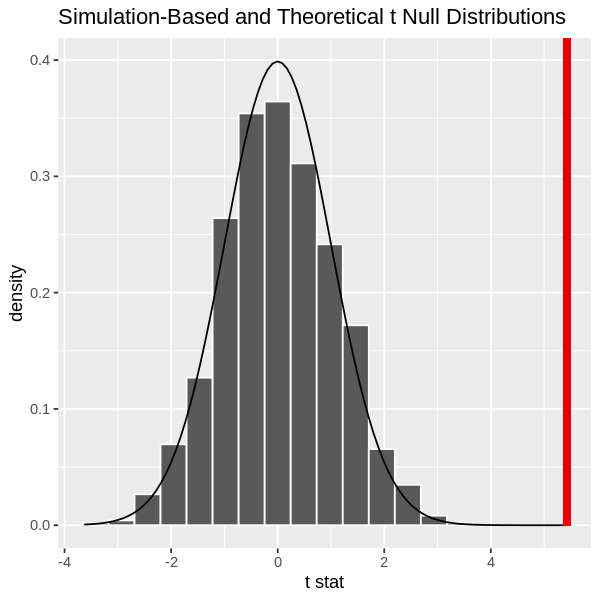

In [21]:
visualize(null_distribution_salary_t, method = "both") +
  shade_p_value(obs_stat = obs_two_sample_t, direction = "right")

In [22]:
null_distribution_salary_t %>% 
  get_p_value(obs_stat = obs_two_sample_t, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


### References

* Arceo-Gomez, E. O., Campos-Vazquez, R. M., Badillo, R.Y. et al. (2022). Gender stereotypes in job advertisements: What do they imply for the gender salary gap?. J Labor Res 43, 65–102. https://doi.org/10.1007/s12122-022-09331-4

* Blau, F. D. & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. J Econ Lit 55(3):789–865. https://doi.org/10.1257/jel.20160995

* Hoisl, K. & Mariani, M. (2016). It’s a Man’s Job: Income and the Gender Gap in Industrial Research. Management Science 63(3):766-790.
https://doi.org/10.1287/mnsc.2015.2357

* Jauhari, N. (2019). Glassdoor- Analyze Gender Pay Gap [Dataset]. Kaggle. https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/discussion  